<a href="https://colab.research.google.com/github/ViniciusPezatti/Projeto_DNC/blob/main/Desafio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

In [ ]:
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#Tratamento de Dados
*   Remover valores nulos
*   Remover duplicatas
*   Converter a coluna InvoiceDate

In [ ]:
# Remover duplicatas
df_limpo = df.drop_duplicates()

# Remover registros com CustomerID nulo
df_limpo = df_limpo.dropna(subset=['CustomerID'])

# Converter a coluna 'InvoiceDate' para o formato de data
df_limpo['InvoiceDate'] = pd.to_datetime(df_limpo['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Confirmar as mudanças
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


#Cálculo do RFM

calcular as métricas Recência (RFM)

In [ ]:
# Definir a data de referência (última data do dataset)
data_ref = df_limpo['InvoiceDate'].max() + dt.timedelta(days=1)

# Cálculo das métricas RFM
rfm = df_limpo.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_ref - x.max()).days,  # Recência
    'InvoiceNo': 'nunique',  # Frequência
    'UnitPrice': lambda x: (x * df_limpo.loc[x.index, 'Quantity']).sum()  # Valor Monetário
})

# Renomear as colunas para Recência, Frequência e Valor Monetário
rfm.columns = ['Recencia', 'Frequencia', 'ValorMonetario']

# Exibir as primeiras linhas do RFM
rfm.head()

,Recencia,Frequencia,ValorMonetario
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


#Pré-processamento dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Criar o escalador
scaler = MinMaxScaler()

# Normalizar as colunas de Recência, Frequência e ValorMonetário
rfm_scaled = scaler.fit_transform(rfm)

# Transformar os dados normalizados em um DataFrame novamente
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recencia', 'Frequencia', 'ValorMonetario'], index=rfm.index)

# Exibir as primeiras linhas dos dados normalizados
rfm_scaled.head()


,Recencia,Frequencia,ValorMonetario
CustomerID,,,
12346.0,0.871314,0.004049,0.015109
12347.0,0.002681,0.024291,0.030297
12348.0,0.198391,0.012146,0.021442
12349.0,0.048257,0.000000,0.021303
12350.0,0.828418,0.000000,0.016288


#outliers

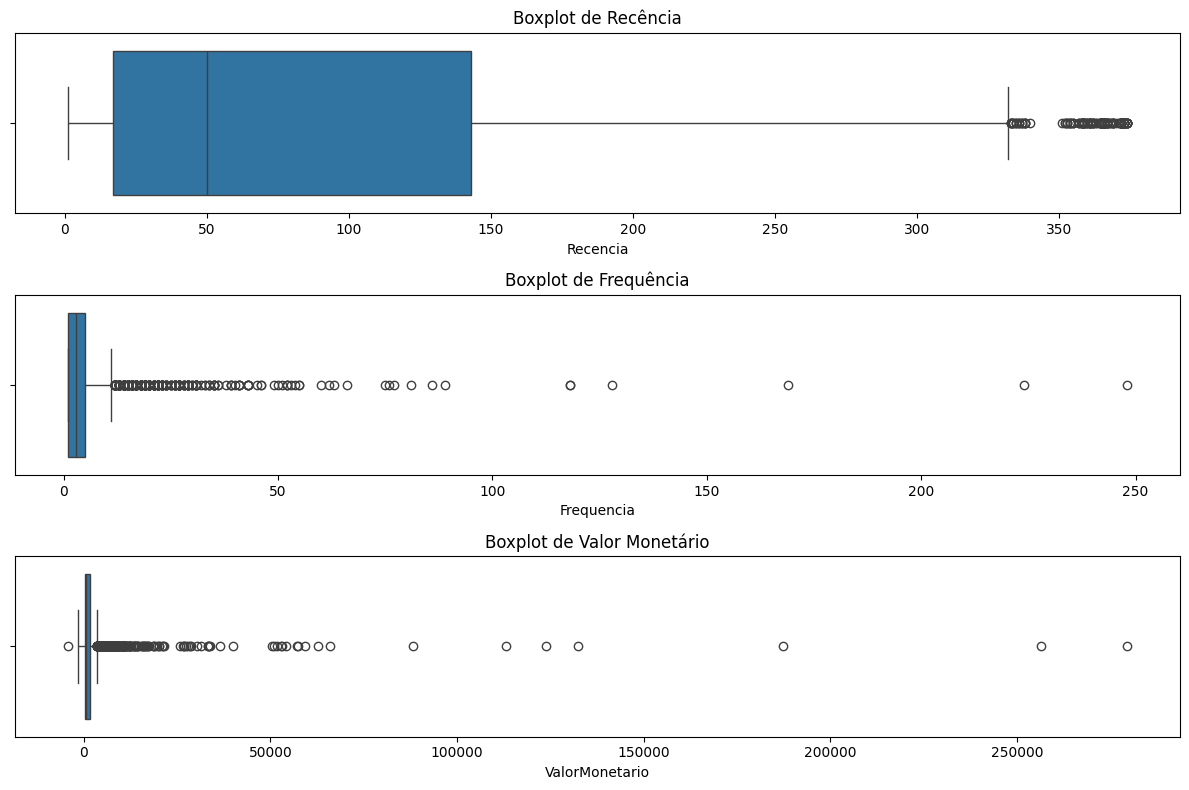

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar boxplots para cada variável de interesse
plt.subplot(3, 1, 1)
sns.boxplot(data=rfm, x='Recencia')
plt.title('Boxplot de Recência')

plt.subplot(3, 1, 2)
sns.boxplot(data=rfm, x='Frequencia')
plt.title('Boxplot de Frequência')

plt.subplot(3, 1, 3)
sns.boxplot(data=rfm, x='ValorMonetario')
plt.title('Boxplot de Valor Monetário')

# Exibir os gráficos
plt.tight_layout()
plt.show()

In [ ]:
# Definir limites para outliers
Q1 = rfm_scaled.quantile(0.25)
Q3 = rfm_scaled.quantile(0.75)
IQR = Q3 - Q1

# Remover os outliers
rfm_no_outliers = rfm_scaled[~((rfm_scaled < (Q1 - 1.5 * IQR)) | (rfm_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]

# Exibir os dados sem outliers
rfm_no_outliers.head()

,Recencia,Frequencia,ValorMonetario
CustomerID,,,
12346.0,0.871314,0.004049,0.015109
12348.0,0.198391,0.012146,0.021442
12349.0,0.048257,0.000000,0.021303
12350.0,0.828418,0.000000,0.016288
12353.0,0.544236,0.000000,0.015423


#Seleção do algoritmo de clusterização

## K-Means

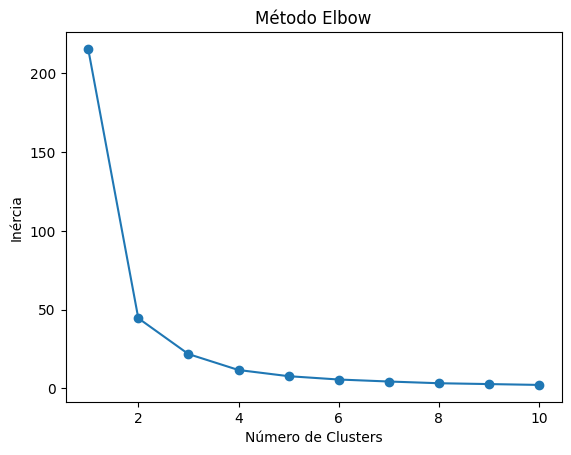

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Testar diferentes números de clusters
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_no_outliers)
    inercia.append(kmeans.inertia_)

# Plotar o gráfico do método Elbow
plt.plot(range(1, 11), inercia, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


In [ ]:
# Definir o número de clusters com base no gráfico Elbow (por exemplo, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar o modelo e prever os clusters
clusters = kmeans.fit_predict(rfm_no_outliers)

# Adicionar os clusters ao DataFrame original
rfm_no_outliers['Cluster'] = clusters

# Exibir os dados com os clusters atribuídos
rfm_no_outliers.head()

,Recencia,Frequencia,ValorMonetario,Cluster
CustomerID,,,,
12346.0,0.871314,0.004049,0.015109,1
12348.0,0.198391,0.012146,0.021442,0
12349.0,0.048257,0.000000,0.021303,0
12350.0,0.828418,0.000000,0.016288,1
12353.0,0.544236,0.000000,0.015423,1


#Análise dos clusters

In [ ]:
# Análise dos clusters
rfm_no_outliers.groupby('Cluster').mean()

,Recencia,Frequencia,ValorMonetario
Cluster,,,
0,0.085218,0.010489,0.018498
1,0.699240,0.002590,0.016518
2,0.363566,0.006125,0.017433


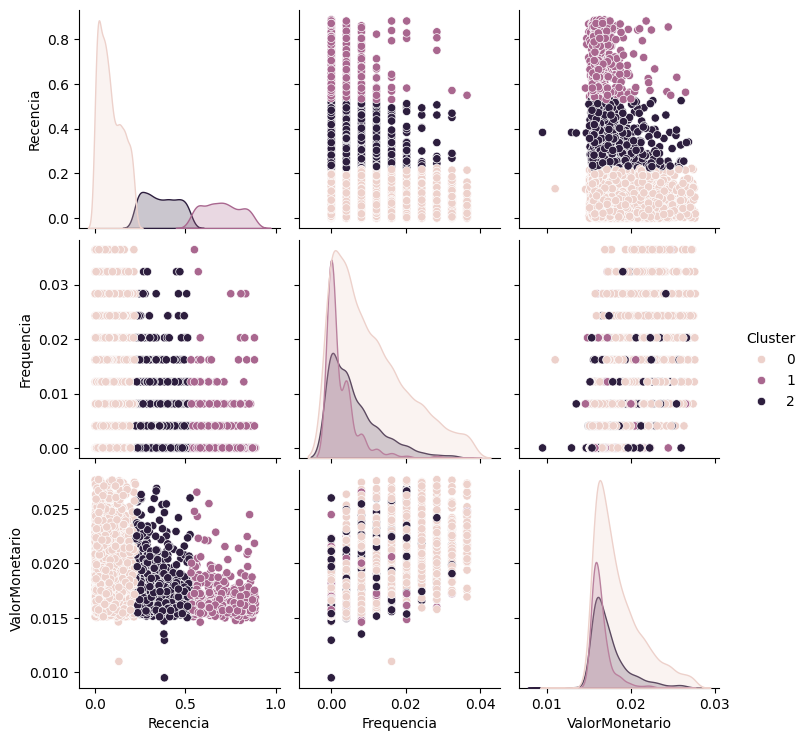

In [ ]:
import seaborn as sns

# Plotar os clusters em um gráfico de dispersão
sns.pairplot(rfm_no_outliers, hue='Cluster', vars=['Recencia', 'Frequencia', 'ValorMonetario'])
plt.show()